SKIP TO THE BOTTOM FOR FINAL SUBMISSION SOLUTION, THE TOP IS MY SCRATCH PAD

In [1]:
!pip install keras-ocr
from google.colab.patches import cv2_imshow
import json
import cv2
import numpy as np
import pandas as pd
from keras_ocr import detection, recognition
from keras.models import Model
from keras.layers import Dense
import keras_ocr
import string

In [226]:
images = ['testimage1.jpeg','testimage2.jpeg','testimage3.jpeg','testimage4.jpeg','testimage5.jpeg']
images2 = []
for imgs in images:  
  img = cv2.imread(imgs)
  img = cv2.resize(img, (1250,360))
  images2.append(img)

1
2
3
4
true 117 200 249
6
7
8
true 346 375 388
10
11
12
true 431 450 529
14
15
16
17
18
19
20
21
22
true 30 500 836
24
25
ytrue 39 66 87
27
28
29
30
31
true 187 200 251
33
34
35
36
ytrue 122 130 152
38
39
40
41
42
43
true 170 200 251
45
46
47
48
49
50
true 362 375 416
52
53
true 433 450 540
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
ytrue 184 185 200
74
75
76
77
78
79
80
81
82
83
84
true 157 200 249
86
87
88
89
90
91
true 362 375 410
93
94
true 432 450 528
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
true 449 500 545
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
true 594 640 654
135
136
true 694 750 1054
138
139


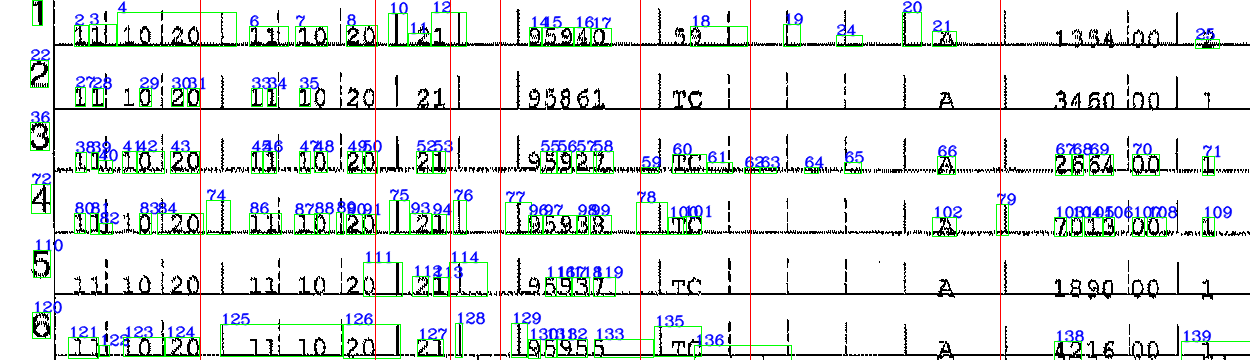

1
2
3
4
5
6
7
8
9
true 183 200 204
11
12
13
14
15
16
17
18
19
true 337 375 377
21
22
true 397 450 468
24
25
true 495 500 507
27
28
29
30
31
32
33
true 638 640 698
35
true 698 750 755
37
38
ytrue 11 66 69
40
41
42
43
44
45
46
47
48
true 198 200 374
50
true 374 375 436
52
true 436 450 499
54
true 499 500 532
56
true 532 640 693
58
true 693 750 782
60
61
62
63
64
true 968 1000 1035
66
67


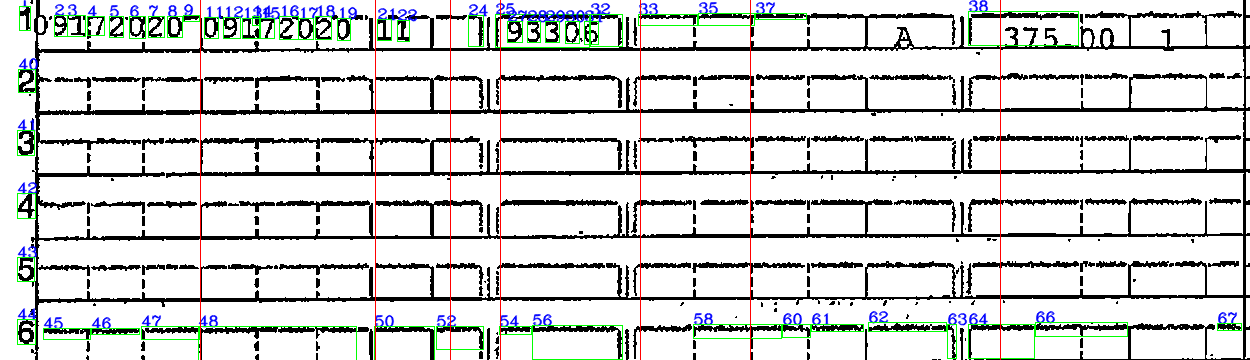

1
2
3
4
5
6
7
true 185 200 234
9
10
11
12
13
14
15
true 359 375 406
17
18
true 417 450 468
20
true 468 500 550
22
23
24
25
true 582 640 665
27
28
true 680 750 896
30
true 896 1000 1072
32
33
34
35
36
37
ytrue 36 66 79
39
40
41
42
43
44
45
46
47
true 185 200 234
49
50
51
52
53
54
55
56
57
true 358 375 406
59
60
true 417 450 468
62
true 468 500 562
64
65
66
true 594 640 896
68
69
70
71
72
73
74
ytrue 97 130 141
76
true 34 200 326
78
79
ytrue 156 185 201
81
82
83
true 101 200 326
85
86
87
ytrue 210 250 264
89
true 34 200 326
91
92
93
ytrue 282 305 327
95
true 34 200 326
97
98
true 326 375 1152
100


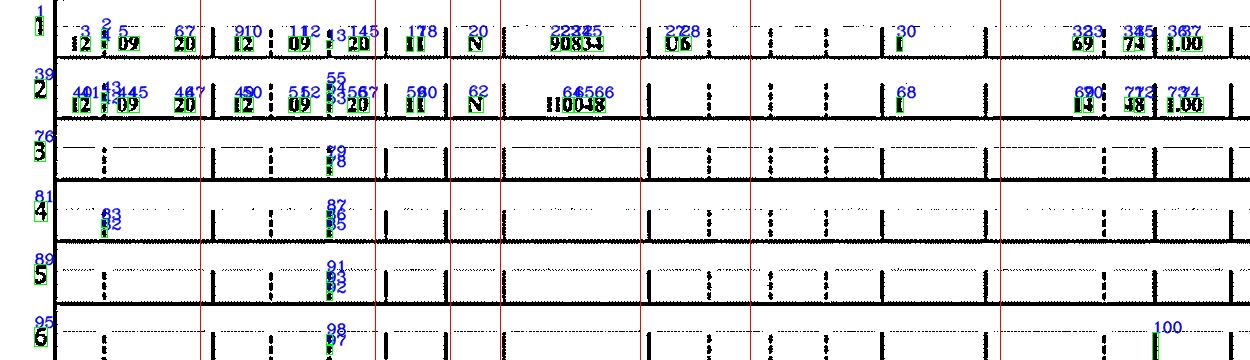

1
2
3
4
5
6
7
8
9
true 163 200 209
11
12
13
14
15
16
17
true 336 375 381
19
20
true 401 450 513
22
23
24
25
26
27
28
29
30
31
32
33
true 6 500 1108
35
36
37
38
39
40


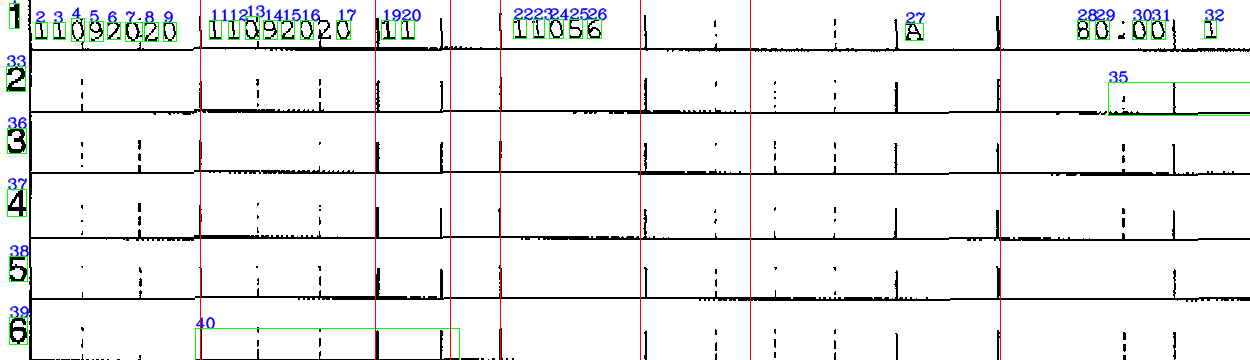

1
2
3
4
5
6
7
true 182 200 227
9
10
11
12
13
14
true 353 375 396
16
17
true 412 450 518
19
20
21
22
23
24
25
26
27
28
29
30
31
32
ytrue 36 66 74
34
35
36
37
38
39
40
true 182 200 227
42
43
44
45
46
47
true 352 375 396
49
50
true 412 450 518
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
ytrue 96 130 133
68
69
70
71
72
73
74
true 183 200 228
76
77
78
79
80
81
true 354 375 397
83
84
true 413 450 519
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
ytrue 155 185 194
102
103
104
105
106
107
108
true 183 200 228
110
111
112
113
114
115
true 354 375 397
117
118
true 413 450 519
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
ytrue 218 250 257
137
true 20 200 229
139
140
141
142
143
144
true 355 375 398
146
147
true 414 450 521
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
ytrue 280 305 316
170
171
172
173
174
true 182 200 220
176
177
178
true 339 375 395
180
181
true 414 450 484
183
true 484 500 538
185
186
187
true 569 640 652
189
190
true 667 75

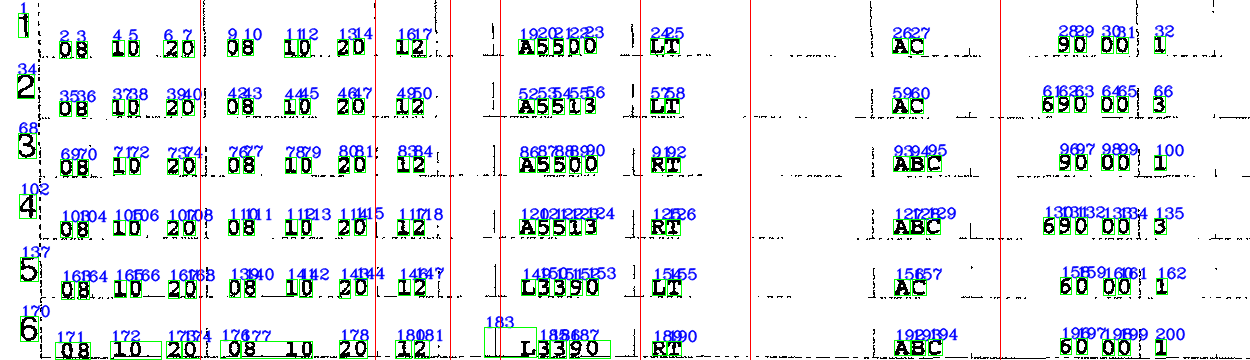

In [22]:
#NOT A GOOD WAY TO ORGANIZE CELLS!
images = ['testimage1.jpeg','testimage2.jpeg','testimage3.jpeg','testimage4.jpeg','testimage5.jpeg']
images2 = []
for imgs in images[:5]:  
  img = cv2.imread(imgs)
  img = cv2.resize(img, (1250,360))
  images2.append(img)
#images = images[4:5]
for imgs in images2:  
  #img = cv2.imread(imgs)

  # Convert to grayscale
  gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)

  # Apply adaptive thresholding
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  
  # Find contours
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #sort contours left to right and top to bottom
  def get_contour_precedence(contour, cols):
    tolerance_factor = 35
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]
  contours = sorted(contours,key=lambda x:get_contour_precedence(x, img.shape[1]))
  #repair kernel
  thresh = cv2.bitwise_not(thresh)
  kernel = np.ones((3,3),np.uint8)
  gray = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
  # Draw bounding boxes around each character
  min_area = 20
  max_area = 1000
  boxes = []
  x_intercept = [200,375, 450,500,640,750,1000]
  y_intercept = [66,130,185,250,305]
  cell_slider = 0
  line_slider = 0
  for cnt in contours:
      area = cv2.contourArea(cnt)
      (x, y, w, h) = cv2.boundingRect(cnt)
      if area > min_area and area < max_area and w>5 and h<35 and h>5:
        #if boxes are on the next line send code to begin new list
        #check if X value is in the next cell
        
        if boxes and boxes[-1][0]!= 0 and boxes[-1][0] < x_intercept[cell_slider] <x:
          print('true', boxes[-1][0] , x_intercept[cell_slider],x)
          boxes.append((1,1,1,1))
          (x, y, w, h) = cv2.boundingRect(cnt) 
          if cell_slider < (len(x_intercept)-1):
            cell_slider+=1

        #check if Y value is in the next line
        if boxes and boxes[-1][1] != 1 and boxes[-1][1] < y_intercept[line_slider] <y:
          print('ytrue', boxes[-1][1] , y_intercept[line_slider],y)
          if line_slider < (len(y_intercept)-1):
            line_slider+=1
          boxes.append((0,0,0,0))
          cell_slider = 0

        (x, y, w, h) = cv2.boundingRect(cnt) 
        boxes.append((x, y, w, h))
        print(len(boxes))
        cv2.putText(gray,f'{len(boxes)}',(x,y),cv2.FONT_HERSHEY_COMPLEX,.5,(255,0,0),1,cv2.LINE_AA)
        #show bounding boxes for debugging only
        cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 0)
  #print(len(boxes))

  for y_int in y_intercept:
    x1, y1 = 0, y_int
    x2, y2 = gray.shape[1], y_int
    line_thickness = 1
    #cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), thickness=line_thickness)   
  for x_int in x_intercept:
    x1, y1 = x_int, 0
    x2, y2 = x_int, gray.shape[0]
    line_thickness = 1
    cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), thickness=line_thickness)
  cv2_imshow(gray)

1
2
true 117 200 388
4
5
6
7
8
9
10
11
true 346 375 529
13
14
15
16
17
18
19
true 408 450 836
21
22
23
24
ytrue 60 66 87
26
27
28
29
30
true 187 200 251
32
33
34
35
ytrue 122 130 152
37
38
39
40
41
true 170 200 251
43
44
45
46
47
48
true 362 375 416
50
51
true 433 450 540
53
54
55
56
57
58
59
60
61
62
63
64
true 98 500 641
66
67
68
69
70
71
72
ytrue 184 185 200
74
75
76
77
78
79
80
81
82
83
true 157 200 249
85
86
87
88
89
90
true 362 375 410
92
93
true 432 450 528
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
true 433 500 545
116
117
118
119
120
121
122
123
124
true 511 640 654
126
127
128
129
130
131
132
133
134
135
136
true 694 750 1054
138
139


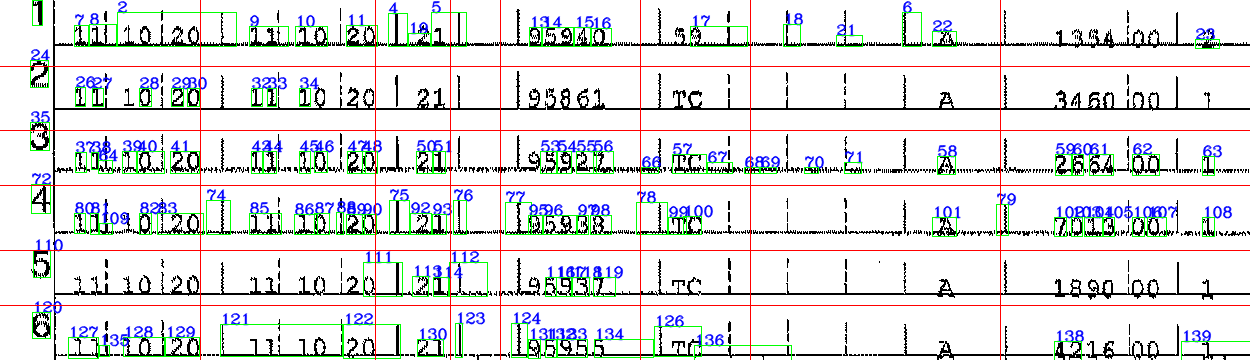

1
2
3
4
5
6
7
8
9
true 183 200 204
11
12
13
14
15
16
17
18
19
true 337 375 377
21
true 377 450 468
23
24
true 495 500 590
26
27
true 638 640 698
29
true 698 750 755
31
32
33
34
35
36
37
38
ytrue 21 66 69
40
41
42
43
44
45
46
47
48
true 198 200 374
50
true 374 375 436
52
true 436 450 499
54
true 499 500 532
56
true 532 640 693
58
true 693 750 782
60
61
62
63
64
true 968 1000 1035
66
67


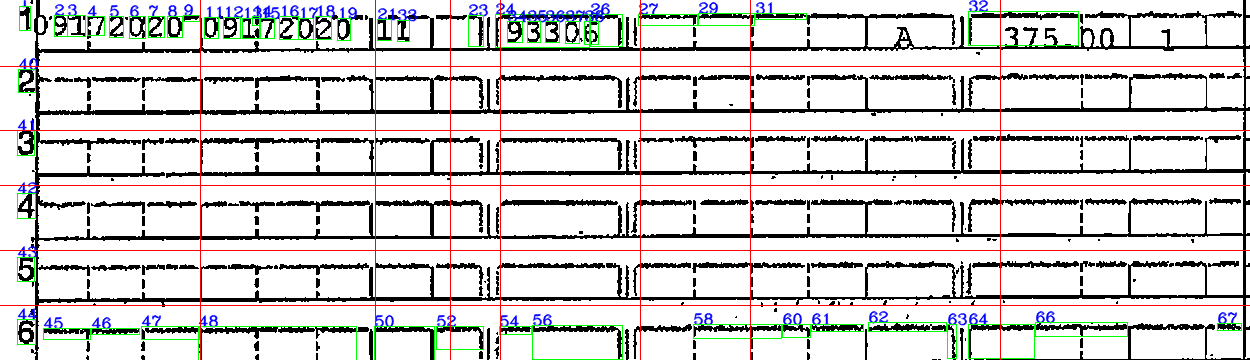

1
2
3
4
5
6
true 185 200 234
8
9
10
11
12
13
true 359 375 406
15
16
true 417 450 468
18
true 468 500 550
20
21
22
23
true 582 640 665
25
26
true 680 750 896
28
true 896 1000 1072
30
31
32
33
34
35
36
37
ytrue 40 66 79
39
true 34 200 326
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
true 358 375 406
57
58
true 417 450 468
60
true 468 500 562
62
63
64
true 594 640 896
66
67
68
69
70
71
72
73
74
ytrue 103 130 141
76
true 34 200 326
78
79
ytrue 166 185 201
81
82
true 101 200 326
84
85
86
87
ytrue 229 250 264
89
true 34 200 326
91
92
93
ytrue 292 305 327
95
true 34 200 326
97
true 326 375 1152
99
100


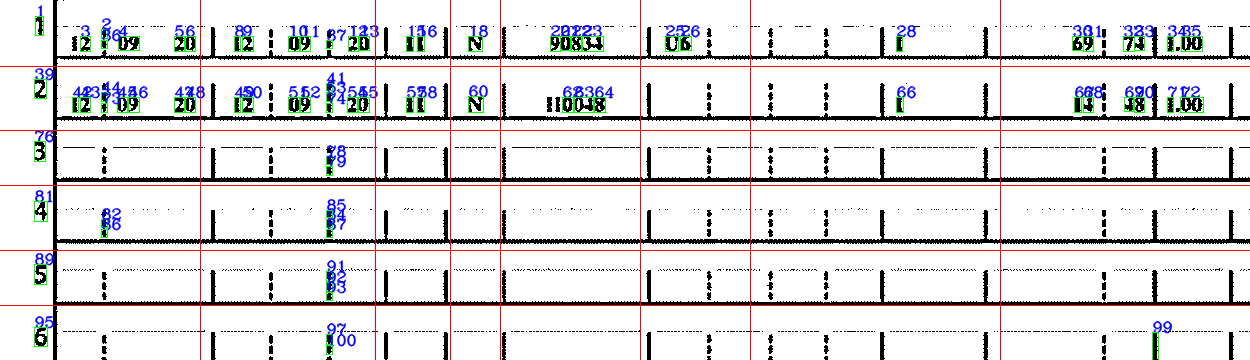

1
2
true 71 200 245
4
true 245 375 513
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
true 401 450 905
27
28
29
30
31
32
33
true 6 500 1108
35
36
37
38
39
40


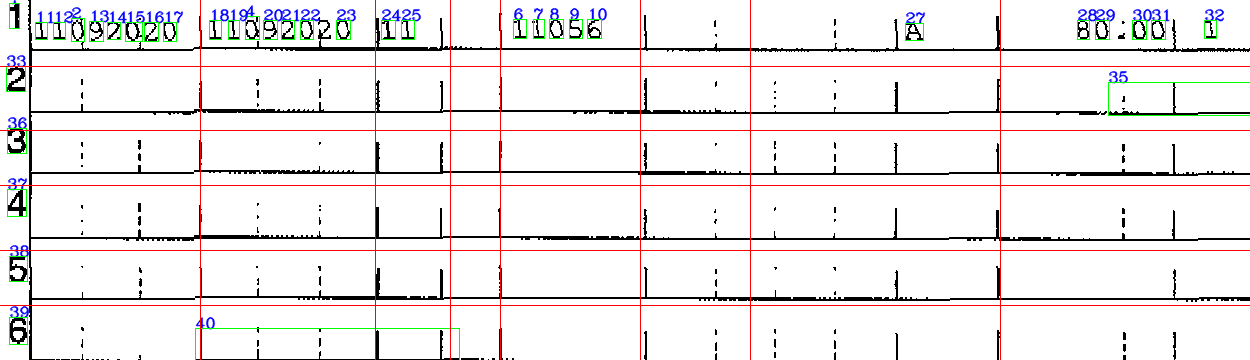

1
true 18 200 227
3
4
5
6
7
8
true 353 375 396
10
11
true 412 450 518
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
ytrue 40 66 74
34
35
36
37
38
true 182 200 227
40
41
42
43
44
45
true 352 375 396
47
48
true 412 450 518
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
ytrue 101 130 133
68
69
70
71
72
73
74
true 183 200 228
76
77
78
79
80
81
true 354 375 397
83
84
true 413 450 519
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
ytrue 155 185 194
102
true 19 200 228
104
105
106
107
108
109
true 354 375 397
111
112
true 413 450 519
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
ytrue 220 250 257
137
true 20 200 229
139
140
141
142
143
144
true 355 375 398
146
147
true 414 450 521
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
ytrue 280 305 316
170
true 20 200 484
172
173
174
175
176
177
178
179
180
181
182
183
184
185
true 339 375 395
187
188
true 414 450 538
190
191
192
193
194
195
196


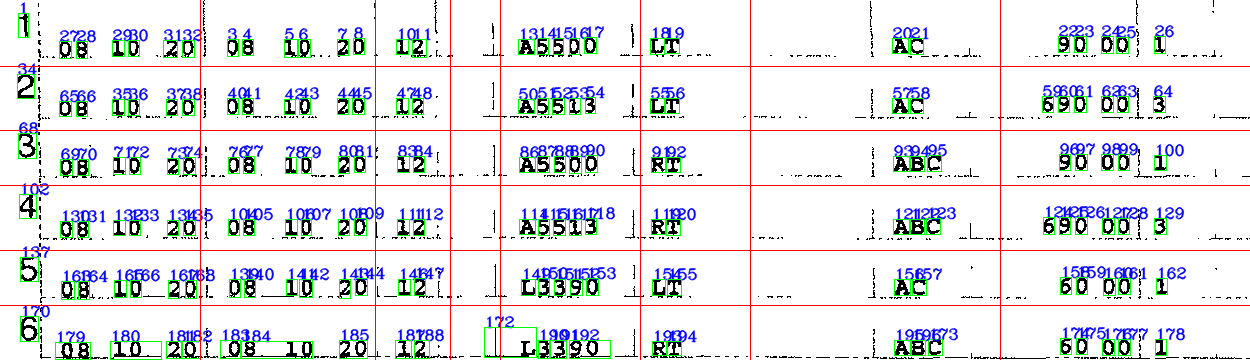

In [193]:
#USE FOR DRAWING AND ITERATING HARD CODED GRID
images = ['testimage1.jpeg','testimage2.jpeg','testimage3.jpeg','testimage4.jpeg','testimage5.jpeg']
images2 = []
for imgs in images[:5]:  
  img = cv2.imread(imgs)
  img = cv2.resize(img, (1250,360))
  images2.append(img)
#images = images[4:5]
for imgs in images2:  
  #img = cv2.imread(imgs)

  # Convert to grayscale
  gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)

  # Apply adaptive thresholding
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  #thresh = cv2.adaptiveThreshold(gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 35, 35)
  #thresh = cv2.dilate(thresh, kernel, iterations=1)
  
  # Find contours
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #sort contours left to right and top to bottom
  def get_contour_precedence(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]
  contours = sorted(contours,key=lambda x:get_contour_precedence(x, img.shape[1]))
  #repair kernel
  thresh = cv2.bitwise_not(thresh)
  kernel = np.ones((3,3),np.uint8)
  gray = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
  # Draw bounding boxes around each character
  min_area = 20
  max_area = 1000
  boxes = []
  x_intercept = [200,375, 450,500,640,750,1000]
  y_intercept = [66,130,185,250,305]
  cell_slider = 0
  line_slider = 0
  for cnt in contours:
      area = cv2.contourArea(cnt)
      (x, y, w, h) = cv2.boundingRect(cnt)
      if area > min_area and area < max_area and w>5 and h<35 and h>5:
        #if boxes are on the next line send code to begin new list
        #check if X value is in the next cell
        
        if boxes and boxes[-1][0]!= 0 and boxes[-1][0] < x_intercept[cell_slider] <x:
          print('true', boxes[-1][0] , x_intercept[cell_slider],x)
          boxes.append((1,1,1,1))
          (x, y, w, h) = cv2.boundingRect(cnt) 
          if cell_slider < (len(x_intercept)-1):
            cell_slider+=1

        #check if Y value is in the next line
        if boxes and boxes[-1][1] != 1 and boxes[-1][1] < y_intercept[line_slider] <y:
          print('ytrue', boxes[-1][1] , y_intercept[line_slider],y)
          if line_slider < (len(y_intercept)-1):
            line_slider+=1
          boxes.append((0,0,0,0))
          cell_slider = 0

        (x, y, w, h) = cv2.boundingRect(cnt) 
        boxes.append((x, y, w, h))
        print(len(boxes))
        cv2.putText(gray,f'{len(boxes)}',(x,y),cv2.FONT_HERSHEY_COMPLEX,.5,(255,0,0),1,cv2.LINE_AA)
        #show bounding boxes for debugging only
        cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 0)
  #print(len(boxes))

  for y_int in y_intercept:
    x1, y1 = 0, y_int
    x2, y2 = gray.shape[1], y_int
    line_thickness = 1
    cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), thickness=line_thickness)   
  for x_int in x_intercept:
    x1, y1 = x_int, 0
    x2, y2 = x_int, gray.shape[0]
    line_thickness = 1
    cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), thickness=line_thickness)
  cv2_imshow(gray)

In [52]:
#SCRATCH CODE
images = ['testimage1.jpeg','testimage2.jpeg','testimage3.jpeg','testimage4.jpeg','testimage5.jpeg']
images2 = []
for imgs in images[:5]:  
  img = cv2.imread(imgs)
  img = cv2.resize(img, (1250,360))
  images2.append(img)
#images = images[4:5]
for imgs in images2:  
  #img = cv2.imread(imgs)

  # Convert to grayscale
  gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)

  # Apply adaptive thresholding
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  #thresh = cv2.adaptiveThreshold(gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 35, 35)
  #thresh = cv2.dilate(thresh, kernel, iterations=1)
  
  # Find contours
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #sort contours left to right and top to bottom
  def get_contour_precedence(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]
  contours = sorted(contours,key=lambda x:get_contour_precedence(x, img.shape[1]))
  #repair kernel
  thresh = cv2.bitwise_not(thresh)
  kernel = np.ones((3,3),np.uint8)
  gray = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)

In [79]:
string = str(0)+ ','+str(0)
box_of_boxes[string]

[]

In [139]:
alphabet = string.digits + string.ascii_letters[:-22]
recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet)
detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer.model.load_weights('custom_rule14.h5')
detector.model.load_weights('keras_detector_rule14.h5')
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5
Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [ ]:
!pip install easyocr

In [45]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext(box_img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [16]:
from keras.models import load_model

# Load the model from the .h5 file, with custom metric definition
model = load_model('rule14_Model.h5')

42
1/1 [==============================] - 0s 58ms/step


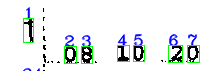

blank
1/1 [==============================] - 0s 53ms/step


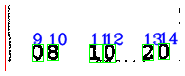

blank
1/1 [==============================] - 0s 57ms/step


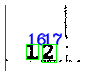

1
['1']
1/1 [==============================] - 0s 55ms/step


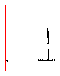

blank
1/1 [==============================] - 0s 58ms/step


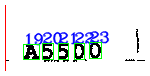

blank
1/1 [==============================] - 0s 52ms/step


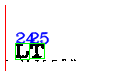

2
['12']
1/1 [==============================] - 0s 60ms/step


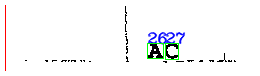

blank
1/1 [==============================] - 0s 55ms/step


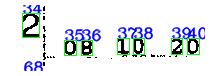

blank
1/1 [==============================] - 0s 57ms/step


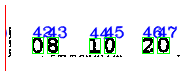

T
['12T']
1/1 [==============================] - 0s 54ms/step


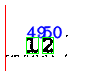

1
['12T1']
1/1 [==============================] - 0s 55ms/step


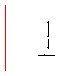

blank
1/1 [==============================] - 0s 59ms/step


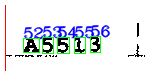

2
['12T12']
1/1 [==============================] - 0s 58ms/step


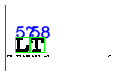

0
['12T120']
1/1 [==============================] - 0s 53ms/step


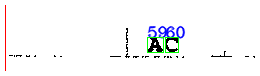

R
['12T120R']
1/1 [==============================] - 0s 53ms/step


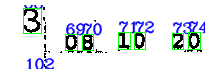

blank
1/1 [==============================] - 0s 64ms/step


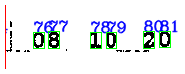

blank
1/1 [==============================] - 0s 83ms/step


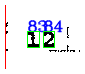

5
['12T120R5']
1/1 [==============================] - 0s 84ms/step


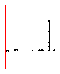

blank
1/1 [==============================] - 0s 94ms/step


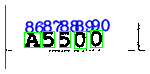

blank
1/1 [==============================] - 0s 85ms/step


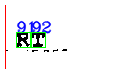

blank
1/1 [==============================] - 0s 88ms/step


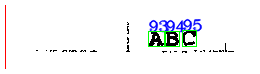

blank
1/1 [==============================] - 0s 90ms/step


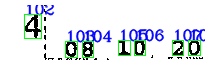

blank
1/1 [==============================] - 0s 86ms/step


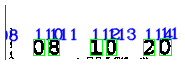

blank
1/1 [==============================] - 0s 83ms/step


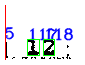

blank
1/1 [==============================] - 0s 84ms/step


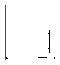

blank
1/1 [==============================] - 0s 80ms/step


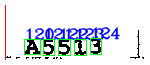

blank
1/1 [==============================] - 0s 84ms/step


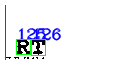

0
['12T120R50']
1/1 [==============================] - 0s 83ms/step


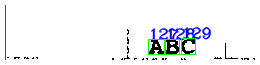

blank
1/1 [==============================] - 0s 86ms/step


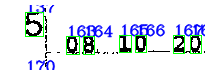

blank
1/1 [==============================] - 0s 83ms/step


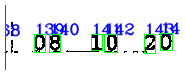

blank
1/1 [==============================] - 0s 82ms/step


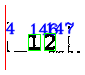

blank
1/1 [==============================] - 0s 87ms/step


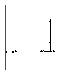

blank
1/1 [==============================] - 0s 93ms/step


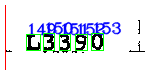

2
['12T120R502']
1/1 [==============================] - 0s 101ms/step


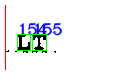

0
['12T120R5020']
1/1 [==============================] - 0s 73ms/step


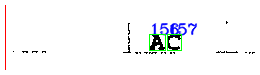

blank
1/1 [==============================] - 0s 60ms/step


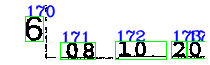

blank
1/1 [==============================] - 0s 53ms/step


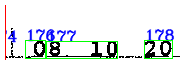

blank
1/1 [==============================] - 0s 51ms/step


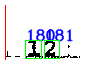

blank
1/1 [==============================] - 0s 52ms/step


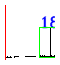

blank
1/1 [==============================] - 0s 57ms/step


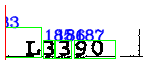

2
['12T120R50202']
1/1 [==============================] - 0s 58ms/step


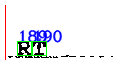

blank
1/1 [==============================] - 0s 62ms/step


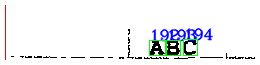

blank


In [44]:
#2nd best solution so far
total = []
output = []
# Iterate through each bounding box
i=0
print(len(boxes))
for box in boxes:
    x, y, w, h = box
    # Extract the box as a separate image
         #group close text together
    if (x,y,w,h) == (1,1,1,1):
      append = 1
      print('new cell')
    #starts new line
    if (x, y, w, h) == (0,0,0,0):
      total.append(output)
      output = []


    box_img = gray[y:y+h, x:x+w]
    box_img = cv2.copyMakeBorder(
                 box_img,5,5,5,5, 
                 cv2.BORDER_CONSTANT, 
                 value=(255,255,255)
              )
    # Resize the image to 200x200 pixels
    resized_img = cv2.resize(box_img, (200, 200))

    # Add a new dimension to the image to represent the batch size
    resized_img = np.expand_dims(resized_img, axis=0)
    resized_img.shape
    box_text = model.predict(resized_img)
    # Recognize the text in the box using Keras OCR
    #box_text = pipeline.recognize([box_img])
    #easyocr
    #box_text = reader.readtext(box_img)
    #box_text=reader.readtext(box_img,detail=0)
    #pytesseract
    #box_text = pytesseract.image_to_string(box_img)
    cv2_imshow(box_img)
    #extract images to load into ocr model for training
    #cv2.imwrite(f'4data_set{i}.jpeg', box_img)
    i+=1
      # Do something with the recognized text
    class_names = ['00', '0','1','10','11','2','20','3','4','5','6','7','8','9','A','B','C','L','N','R','T','blank']
    print(class_names[np.argmax(box_text)])
    if box_text.any() and class_names[np.argmax(box_text)] != 'blank':
      
      if len(output)==0 or append == 1:#starts new element
        output.append(class_names[np.argmax(box_text)])
        append = 0
        
      else:
        output[-1] = output[-1]+class_names[np.argmax(box_text)]
      print(output)
      #output.append(box_text[0][0][0])

total.append(output)

In [143]:
print(total)

[['1001010', '00102012', '', '1500', '01', '10', '02001'], ['2102000', '00102012', '', '5512', '01', '30', '000002'], ['2001020', '00102012', '', '10500', '51', '500', '00001'], ['9001010', '00102012', '', '10011', '21', '500', '000002'], ['9051010', '001002012', '', '05590', 'R1', '10', '50001'], ['0201022', '212', '', '32', '21', '050', '00001']]


FINAL SUBMISSION CODE 

In [ ]:
#LOAD DATASET FROM IMAGES, DATASET SIZE WILL LEAD TO OVERFITTING BUT IS THE BETTER THAN THE OTHER OCRs SO FAR
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/00',
    labels="inferred",
    label_mode='categorical',
    class_names=['00', '0','1','10','11','2','20','3','4','5','6','7','8','9','A','B','C','L','N','R','T','blank'],
    color_mode="rgb",
    batch_size=5,
    image_size=(200, 200),
    shuffle=True,
    seed=5,
    validation_split=.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

In [ ]:
#CREATE CNN MODEL
model = models.Sequential()
model.add(layers.Conv2D(25,(3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))

In [ ]:
#TRAIN MODEL
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=1,
    jit_compile=None,
)


history = model.fit(dataset, epochs=10, shuffle=True)

Epoch 1/10
25/25 [==============================] - 27s 1s/step - loss: 0.9292 - accuracy: 0.9516
Epoch 2/10
25/25 [==============================] - 26s 1s/step - loss: 2.7207 - accuracy: 0.9274
Epoch 3/10
25/25 [==============================] - 25s 986ms/step - loss: 0.7238 - accuracy: 0.9839
Epoch 4/10
25/25 [==============================] - 25s 989ms/step - loss: 0.4795 - accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 25s 987ms/step - loss: 0.4105 - accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 25s 963ms/step - loss: 0.3396 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 25s 1s/step - loss: 0.2709 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 25s 992ms/step - loss: 0.2105 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 25s 968ms/step - loss: 0.1596 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 25s 995ms/step - loss: 0.1210 - accuracy: 1.000

In [ ]:
images = ['testimage1.jpeg','testimage2.jpeg','testimage3.jpeg','testimage4.jpeg','testimage5.jpeg']
images2 = []
for imgs in images[4:5]:  
  img = cv2.imread(imgs)
  img = cv2.resize(img, (1250,360))
  images2.append(img)
#images = images[4:5]
##for imgs in images2:  

In [260]:
# best solution so far

class convert_image:  
  #img = cv2.imread(imgs)
  def __init__(self, name,im):
    self.name = name
    self.im = im
    # Convert to grayscale
    gray = cv2.cvtColor(self.im, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #thresh = cv2.adaptiveThreshold(gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 35, 35)
    #thresh = cv2.dilate(thresh, kernel, iterations=1)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #sort contours left to right and top to bottom
    def get_contour_precedence(contour, cols):
      tolerance_factor = 10
      origin = cv2.boundingRect(contour)
      return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]
    self.contours = sorted(contours,key=lambda x:get_contour_precedence(x, im.shape[1]))
    #repair kernel
    thresh = cv2.bitwise_not(thresh)
    kernel = np.ones((3,3),np.uint8)
    self.gray = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)

In [280]:
img = convert_image('testimage3.jpeg', im = cv2.imread('testimage3.jpeg'))  

In [ ]:
cv2_imshow(img.gray)

In [269]:
#BOX coordinates for best grid pattern matching
class create_boxes:
    def __init__(self, name, contours):
      self.name = name
      self.contours = contours
      x_intercept = [200,375, 450,500,640,750,1000]
      y_intercept = [0,66,130,185,250,305,360]
      self.boxes =[]
      box= []
      x,y,w,h = 0,0,0,66
      i=0

      for y_in in y_intercept:
        if y !=y_in:
          h=y_in-y
          y=y_in
        i+=1
        x=0
        print(x,y,w,h)
        if i !=0:
          for x_in in x_intercept:
            if x !=x_in:
              w = x_in-x
              box=(x, y, w, h)
              self.boxes.append(box)
            x=x_in

      self.box_of_boxes ={
          '0,0':[],
          '1,0':[],
          '2,0':[],
          '3,0':[],
          '4,0':[],
          '5,0':[],
          '6,0':[],
          '0,1':[],
          '1,1':[],
          '2,1':[],
          '3,1':[],
          '4,1':[],
          '5,1':[],
          '6,1':[],
          '0,2':[],
          '1,2':[],
          '2,2':[],
          '3,2':[],
          '4,2':[],
          '5,2':[],
          '6,2':[],
          '0,3':[],
          '1,3':[],
          '2,3':[],
          '3,3':[],
          '4,3':[],
          '5,3':[],
          '6,3':[],
          '0,4':[],
          '1,4':[],
          '2,4':[],
          '3,4':[],
          '4,4':[],
          '5,4':[],
          '6,4':[],
          '0,5':[],
          '1,5':[],
          '2,5':[],
          '3,5':[],
          '4,5':[],
          '5,5':[],
          '6,5':[],
      }
      #use CONTOURS TO PLACE IMAGES IN CORRESPONDING GRID COORDINATES
      for cnt in self.contours:
            area = cv2.contourArea(cnt)
            (x, y, w, h) = cv2.boundingRect(cnt)
            if area > min_area and area < max_area and w>5 and h<35 and h>5:
              #if boxes are on the next line send code to begin new list
              #check if X value is in the next cell
              
              if 0<x<x_intercept[0]:
                box_x = 0
              elif x_intercept[0]<x<x_intercept[1]:
                box_x = 1
              elif x_intercept[1]<x<x_intercept[2]:
                box_x = 1
              elif x_intercept[2]<x<x_intercept[3]:
                box_x = 2
              elif x_intercept[3]<x<x_intercept[4]:
                box_x = 3
              elif x_intercept[4]<x<x_intercept[5]:
                box_x = 4     
              elif x_intercept[5]<x<x_intercept[6]:
                box_x = 5    
              elif x_intercept[6]<x<1250:
                box_x = 6    

              if y_intercept[0]<y<y_intercept[1]:
                box_y = 0      
              elif y_intercept[1]<y<y_intercept[2]:
                box_y = 1 
              elif y_intercept[2]<y<y_intercept[3]:
                box_y = 2 
              elif y_intercept[3]<y<y_intercept[4]:
                box_y = 3 
              elif y_intercept[4]<y<y_intercept[5]:
                box_y = 4  
              elif y_intercept[5]<y<y_intercept[6]:
                box_y = 5     
      #place boxes in appropriate grid
              #print(box_of_boxes)
              grid_box = str(box_x)+ ','+str(box_y)
              self.box_of_boxes[grid_box].append((x, y, w, h))

              (x, y, w, h) = cv2.boundingRect(cnt) 
              self.boxes.append((x, y, w, h))
              #print(len(boxes))
              #cv2.putText(gray,f'{len(boxes)}',(x,y),cv2.FONT_HERSHEY_COMPLEX,.5,(255,0,0),1,cv2.LINE_AA)
              #show bounding boxes for debugging only
              #cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 0)

In [ ]:
new_boxes.box_of_boxes

In [282]:
new_boxes = create_boxes('new_boxes',img.contours )

0 0 0 66
0 66 250 66
0 130 250 64
0 185 250 55
0 250 250 65
0 305 250 55
0 360 250 55


In [165]:
submission = {
    'testimage1':[],
    'testimage2':[],
    'testimage3':[],
    'testimage4':[],
    'testimage5':[]
}

In [255]:
class read_files:
    def __init__(self, name, box_grid, boxes, img):
      self.name = name
      self.box_grid = box_grid
      self.boxes = boxes
      self.img = img
      self.total = []
      output = []
      # Iterate through each bounding box output[-1]

      print(len(boxes))
      i=0
      #INDICATES NEW CELL
      for grid_ix in self.box_grid:
        #NEW LINE
        if (grid_ix == '0,0' or grid_ix == '0,1' or grid_ix == '0,2' or grid_ix == '0,3' or grid_ix == '0,4' or grid_ix == '0,5') and i != 0:
            append = 1
            self.total.append(output)
            i=0
            print('new cell')
            output = []
        i+=1
        text=''
        #NEW PEICE OF TEXT
        for box in self.box_grid[grid_ix]:
            x, y, w, h = box
            # Extract the box as a separate image
                #group close text together
            box_img = self.img[y:y+h, x:x+w]
            box_img = cv2.copyMakeBorder(
                        box_img,5,5,5,5, 
                        cv2.BORDER_CONSTANT, 
                        value=(255,255,255)
                      )
            # Resize the image to 200x200 pixels
            resized_img = cv2.resize(box_img, (200, 200))

            # Add a new dimension to the image to represent the batch size
            resized_img = np.expand_dims(resized_img, axis=0)
            resized_img.shape
            box_text = model.predict(resized_img)
            # Recognize the text in the box using Keras OCR
            #box_text = pipeline.recognize([box_img])
            #easyocr
            #box_text = reader.readtext(box_img)
            #box_text=reader.readtext(box_img,detail=0)
            #pytesseract
            #box_text = pytesseract.image_to_string(box_img)
            cv2_imshow(box_img)
            #extract images to load into ocr model for training
            #cv2.imwrite(f'4data_set{i}.jpeg', box_img)

              # Do something with the recognized text
            class_names = ['00', '0','1','10','11','2','20','3','4','5','6','7','8','9','A','B','C','L','N','R','T','blank']
            print(class_names[np.argmax(box_text)])
            if box_text.any() and class_names[np.argmax(box_text)] != 'blank':
                text=text+class_names[np.argmax(box_text)]

                #output[-1] = output[-1]+class_names[np.argmax(box_text)]
                print(text)
              #output.append(box_text[0][0][0])
        output.append(text)
        print(output)
        append = 0

      self.total.append(output)


In [ ]:
for x in new_boxes.box_of_boxes:
  print(x)
  for y in new_boxes.box_of_boxes[x]:
    print(y)

In [284]:
reading_file = read_files('testimage5',new_boxes.box_of_boxes, new_boxes.boxes,img.gray)

106
1/1 [==============================] - 0s 131ms/step


2
2
1/1 [==============================] - 0s 83ms/step


2
22
1/1 [==============================] - 0s 117ms/step


00
2200
1/1 [==============================] - 0s 91ms/step


2
22002
1/1 [==============================] - 0s 159ms/step


5
220025
['220025']
1/1 [==============================] - 0s 146ms/step


1
1
1/1 [==============================] - 0s 164ms/step


2
12
1/1 [==============================] - 0s 159ms/step


2
122
1/1 [==============================] - 0s 192ms/step


9
1229
1/1 [==============================] - 0s 180ms/step


2
12292
1/1 [==============================] - 0s 153ms/step


0
122920
1/1 [==============================] - 0s 188ms/step


1
1229201
1/1 [==============================] - 0s 196ms/step


1
12292011
['220025', '12292011']
1/1 [==============================] - 0s 175ms/step


0
0
['220025', '12292011', '0']
1/1 [==============================] - 0s 178ms/step


9
9
1/1 [==============================] - 0s 158ms/step


0
90
1/1 [==============================] - 0s 215ms/step


5
905
1/1 [==============================] - 0s 158ms/step


00
90500
['220025', '12292011', '0', '90500']
1/1 [==============================] - 0s 154ms/step


0
0
1/1 [==============================] - 0s 126ms/step


20
020
['220025', '12292011', '0', '90500', '020']
1/1 [==============================] - 0s 134ms/step


1
1
['220025', '12292011', '0', '90500', '020', '1']
1/1 [==============================] - 0s 170ms/step


1
1
1/1 [==============================] - 0s 117ms/step


5
15
1/1 [==============================] - 0s 87ms/step


1
151
1/1 [==============================] - 0s 112ms/step


0
1510
1/1 [==============================] - 0s 113ms/step


1
15101
1/1 [==============================] - 0s 91ms/step


00
1510100
['220025', '12292011', '0', '90500', '020', '1', '1510100']
new cell
1/1 [==============================] - 0s 77ms/step


2
2
1/1 [==============================] - 0s 81ms/step


1
21
1/1 [==============================] - 0s 100ms/step


2
212
1/1 [==============================] - 0s 111ms/step


5
2125
1/1 [==============================] - 0s 89ms/step


9
21259
1/1 [==============================] - 0s 133ms/step


2
212592
1/1 [==============================] - 0s 107ms/step


5
2125925
1/1 [==============================] - 0s 106ms/step


5
21259255
1/1 [==============================] - 0s 70ms/step


2
212592552
['212592552']
1/1 [==============================] - 0s 170ms/step


1
1
1/1 [==============================] - 0s 123ms/step


2
12
1/1 [==============================] - 0s 76ms/step


2
122
1/1 [==============================] - 0s 170ms/step


9
1229
1/1 [==============================] - 0s 87ms/step


2
12292
1/1 [==============================] - 0s 102ms/step


0
122920
1/1 [==============================] - 0s 79ms/step


1
1229201
1/1 [==============================] - 0s 136ms/step


1
12292011
['212592552', '12292011']
1/1 [==============================] - 0s 111ms/step


6
6
['212592552', '12292011', '6']
1/1 [==============================] - 0s 90ms/step


0
0
1/1 [==============================] - 0s 138ms/step


00
000
1/1 [==============================] - 0s 96ms/step


5
0005
['212592552', '12292011', '6', '0005']
['212592552', '12292011', '6', '0005', '']
1/1 [==============================] - 0s 117ms/step


1
1
['212592552', '12292011', '6', '0005', '', '1']
1/1 [==============================] - 0s 107ms/step


1
1
1/1 [==============================] - 0s 103ms/step


4
14
1/1 [==============================] - 0s 53ms/step


4
144
1/1 [==============================] - 0s 51ms/step


5
1445
1/1 [==============================] - 0s 60ms/step


1
14451
1/1 [==============================] - 0s 60ms/step


00
1445100
['212592552', '12292011', '6', '0005', '', '1', '1445100']
new cell
['']
['', '']
['', '', '']
['', '', '', '']
['', '', '', '', '']
['', '', '', '', '', '']
['', '', '', '', '', '', '']
new cell
1/1 [==============================] - 0s 55ms/step


5
5
['5']
['5', '']
['5', '', '']
['5', '', '', '']
['5', '', '', '', '']
['5', '', '', '', '', '']
['5', '', '', '', '', '', '']
new cell
1/1 [==============================] - 0s 66ms/step


0
0
['0']
['0', '']
['0', '', '']
['0', '', '', '']
['0', '', '', '', '']
['0', '', '', '', '', '']
['0', '', '', '', '', '', '']
new cell
['']
['', '']
['', '', '']
['', '', '', '']
['', '', '', '', '']
['', '', '', '', '', '']
['', '', '', '', '', '', '']


In [285]:
reading_file.total

[['220025', '12292011', '0', '90500', '020', '1', '1510100'],
 ['212592552', '12292011', '6', '0005', '', '1', '1445100'],
 ['', '', '', '', '', '', ''],
 ['5', '', '', '', '', '', ''],
 ['0', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '']]

In [190]:
submission['testimage5']=total
submission

{'testimage1': [['122', '101', '', '141', '', '02001', ''],
  ['110200', '111', '', '', '', '', ''],
  ['1112214', '12101021', '', '10011', '11', '2001', '101'],
  ['1101', '210021021', '1', '119021', 'T2', '12', '70110101'],
  ['', '21', '', '200320', '', '', ''],
  ['1020201', '00', '2', '10900', '', '', '0']],
 'testimage2': [['102020', '09291202011', '', '02200', '', '', ''],
  ['20', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['1', '', '', '', '', '', ''],
  ['', '', '', '', '', '', ''],
  ['0', '', '', '', '', '2', '']],
 'testimage3': [['21200251',
   '120020111',
   '0',
   '92500',
   '2020',
   '1',
   '1529100'],
  ['211159251', '1120912C111', '1', '20020', '', '1', '25420100'],
  ['5', '11', '', '', '', '', ''],
  ['211', '111', '', '', '', '', ''],
  ['5', '111', '', '', '', '', ''],
  ['0', '11', '', '', '', '', '1']],
 'testimage4': [['1011020202', '011020011', '', '11056', '', '9', '00001'],
  ['0', '', '', '', '', '', ''],
  ['', '', '', '', '', '', '']

In [189]:
total

[['1001010', '00102012', '', '1500', '01', '10', '02001'],
 ['2102000', '00102012', '', '1912', '01', '10', '002002'],
 ['2051020', '00102012', '', '1910', '21', '100', '00001'],
 ['9001010', '05102012', '', '1911', '21', '100', '002002'],
 ['9051020', '001002212', '', '05510', 'R1', '10', '50001'],
 ['020122', '212', '', '532', '21', '019', '00001']]

In [194]:
import json
with open('Knapp_Michael_Results.json', 'w', encoding='utf-8') as f:
    json.dump(submission, f, ensure_ascii=False, indent=4)